In [3]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv("test_volume_data.csv")
df

,company_id,company_type,date,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
0,1,Conference,2018-01-01,4.183942,1,86,0,6680.24,2,2562,0,100000.0,1,4590,1
1,2,Enterprise,2018-01-01,3.692000,4,246,0,2208.22,2,2410,100,400000.0,1,35405,1
2,4,Enterprise,2018-01-01,0.000000,0,1,0,0.00,1,207,0,1500.0,1,302,1
3,6,Conference,2018-01-01,3.971564,0,0,0,695.99,2,62,0,5715.0,1,167,1
4,10,Enterprise,2018-01-01,3.371562,0,0,0,0.00,1,13,0,NaN,0,672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108755,420,Enterprise,2021-03-25,0.000000,0,0,0,0.00,1,2,0,NaN,0,8,1
108756,444,Carrier,2021-03-25,3.896667,0,5,0,2.72,2,7,0,NaN,0,20,1
108757,447,Enterprise,2021-03-25,3.809369,1,13,0,449.10,2,121,0,NaN,0,280,1
108758,450,Enterprise,2021-03-25,0.000000,0,0,0,0.00,0,0,0,NaN,0,0,0


In [4]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [5]:
from pandas_profiling import ProfileReport

In [6]:
report  = ProfileReport(df, minimal = True, title= 'data')
report.to_file('edareport.html')

In [8]:
profile = ProfileReport(df)

In [9]:
profile

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108760 entries, 0 to 108759
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_id               108760 non-null  int64  
 1   company_type             108760 non-null  object 
 2   date                     108760 non-null  object 
 3   avg_pesq_score           108760 non-null  float64
 4   quality_too_poor         108760 non-null  int64  
 5   number_busy              108760 non-null  int64  
 6   temporarily_unable_test  108760 non-null  int64  
 7   outage_sec               108760 non-null  float64
 8   number_test_types        108760 non-null  int64  
 9   numbers_tested           108760 non-null  int64  
 10  followup_tests           108760 non-null  int64  
 11  min_commit               53438 non-null   float64
 12  has_min_commit           108760 non-null  int64  
 13  volume_tests             108760 non-null  int64  
 14  is_t

(108760, 15)

In [11]:
df.isnull().sum()

company_id                     0
company_type                   0
date                           0
avg_pesq_score                 0
quality_too_poor               0
number_busy                    0
temporarily_unable_test        0
outage_sec                     0
number_test_types              0
numbers_tested                 0
followup_tests                 0
min_commit                 55322
has_min_commit                 0
volume_tests                   0
is_testing                     0
dtype: int64

In [12]:
!pip install pandas-datareader

In [13]:
import pandas_datareader as pdr
from datetime import datetime

In [14]:
df.head()

,company_id,company_type,date,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
0,1,Conference,2018-01-01,4.183942,1,86,0,6680.24,2,2562,0,100000.0,1,4590,1
1,2,Enterprise,2018-01-01,3.692000,4,246,0,2208.22,2,2410,100,400000.0,1,35405,1
2,4,Enterprise,2018-01-01,0.000000,0,1,0,0.00,1,207,0,1500.0,1,302,1
3,6,Conference,2018-01-01,3.971564,0,0,0,695.99,2,62,0,5715.0,1,167,1
4,10,Enterprise,2018-01-01,3.371562,0,0,0,0.00,1,13,0,NaN,0,672,1


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.company_id.value_counts()

101    1180
84     1180
118    1180
49     1180
30     1180
       ... 
388      19
383      18
279      17
455      17
402      15
Name: company_id, Length: 180, dtype: int64

In [17]:
# There are 180 companies who had undergone testing through the data

# The columns should not be considered from pandas profiling report are:

#date has a high cardinality: 1180 distinct values	Warning(considered)

In [18]:
#avg_pesq_score has 60555 (55.7%) zeros	Zeros(Tests are related to perticular day & average & has lot of missing data)(Neglected)

In [19]:
#quality_too_poor has 96517 (88.7%) zeros	Zeros(Neglected)

In [20]:
#number_busy has 73405 (67.5%) zeros	Zeros(This is not related to test only number of clients)(Neglected)

In [21]:
#temporarily_unable_test is highly skewed (γ1 = 39.08401389)	Skewed(Test are not conducted & highly skewed data)(Neglected)

In [22]:
#temporarily_unable_test has 98694 (90.7%) zeros	Zeros(Neglected)

In [23]:
#outage_sec has 46871 (43.1%) zeros	Zeros(This is again the client lines not related to test)(Neglected)

In [24]:
#number_test_types has 49732 (45.7%) zeros	Zeros(instead of test types the numbers of tests are important)(Neglected)

In [25]:
#numbers_tested has 49732 (45.7%) zeros	Zeros(considered)

In [26]:
#followup_tests is highly skewed (γ1 = 42.23710456)	Skewed(having similar data in follow_up_test has which is having maximum #zeroes & highly skewed data)(Neglected)

In [27]:
#followup_tests has 101604 (93.4%) zeros	Zeros(Neglected)

In [28]:
#min_commit has 55322 (50.9%) missing values	Missing(This will not affect that much on data) (Neglected)

In [29]:
#volume_tests has 38686 (35.6%) zeros	Zeros(If client is still testing means tests are not completed)(Neglected)

## From above decription & profile report only 2 comluns can be used: 
1)Date
2)numbers_tested

In [30]:
df.head()

,company_id,company_type,date,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
0,1,Conference,2018-01-01,4.183942,1,86,0,6680.24,2,2562,0,100000.0,1,4590,1
1,2,Enterprise,2018-01-01,3.692000,4,246,0,2208.22,2,2410,100,400000.0,1,35405,1
2,4,Enterprise,2018-01-01,0.000000,0,1,0,0.00,1,207,0,1500.0,1,302,1
3,6,Conference,2018-01-01,3.971564,0,0,0,695.99,2,62,0,5715.0,1,167,1
4,10,Enterprise,2018-01-01,3.371562,0,0,0,0.00,1,13,0,NaN,0,672,1


In [31]:
df1 = df[['company_id','date','numbers_tested']]
df1

,company_id,date,numbers_tested
0,1,2018-01-01,2562
1,2,2018-01-01,2410
2,4,2018-01-01,207
3,6,2018-01-01,62
4,10,2018-01-01,13
...,...,...,...
108755,420,2021-03-25,2
108756,444,2021-03-25,7
108757,447,2021-03-25,121
108758,450,2021-03-25,0


<AxesSubplot:>

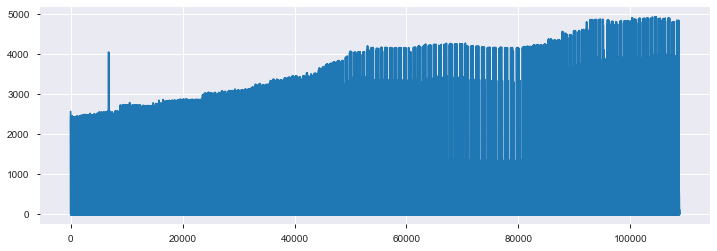

In [32]:
df1['numbers_tested'].plot(figsize=(12,4))

<AxesSubplot:>

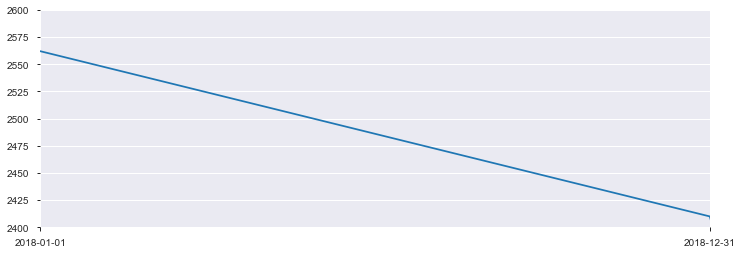

In [33]:
## xlimit and y limit
#1st year plot
df1['numbers_tested'].plot(xlim=['2018-01-01','2018-12-31'],ylim=[2400,2600],figsize=(12,4))

<AxesSubplot:>

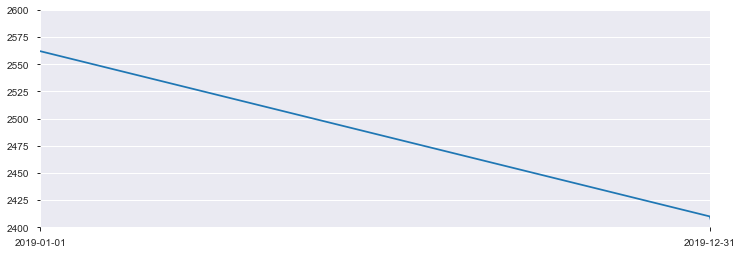

In [34]:
#2nd year plot
df1['numbers_tested'].plot(xlim=['2019-01-01','2019-12-31'],ylim=[2400,2600],figsize=(12,4))

<AxesSubplot:>

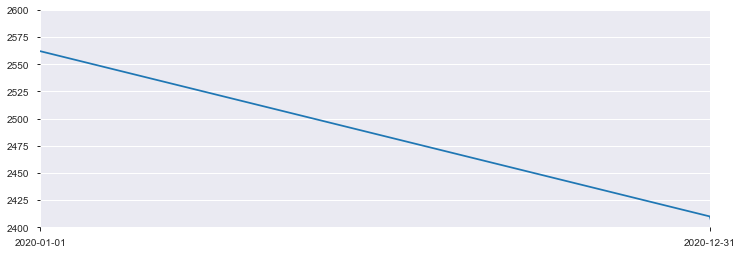

In [35]:
#3rd year plot
df1['numbers_tested'].plot(xlim=['2020-01-01','2020-12-31'],ylim=[2400,2600],figsize=(12,4))

<AxesSubplot:>

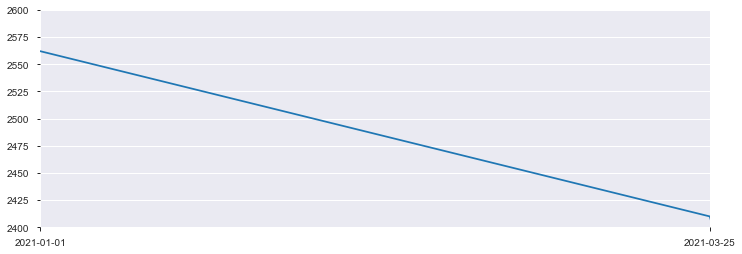

In [36]:
#4th year plot
df1['numbers_tested'].plot(xlim=['2021-01-01','2021-03-25'],ylim=[2400,2600],figsize=(12,4))

In [37]:
# all the graphs indicated that the testing completed for the various companies between 2000 to 3000
# But specifically between 2400 to 2600

# It is observed that testing is at peak when year got started. It is decreasing for end of the year.

In [38]:
df1

,company_id,date,numbers_tested
0,1,2018-01-01,2562
1,2,2018-01-01,2410
2,4,2018-01-01,207
3,6,2018-01-01,62
4,10,2018-01-01,13
...,...,...,...
108755,420,2021-03-25,2
108756,444,2021-03-25,7
108757,447,2021-03-25,121
108758,450,2021-03-25,0


In [39]:

## datetime
from datetime import datetime

In [40]:
datetime.now()

datetime.datetime(2022, 4, 6, 13, 22, 54, 698852)

In [41]:
Date=datetime(2021,11,21)

In [42]:
Date

datetime.datetime(2021, 11, 21, 0, 0)

In [43]:
Date.date()

datetime.date(2021, 11, 21)

In [44]:
Date.day

21

In [45]:
Date.weekday()

6

# Time Resampling


In [46]:
df1=df1.reset_index()

In [47]:
df1=df1.set_index('date',drop=True)

In [48]:
df1.drop('index',axis = 1, inplace = True)

In [49]:
df1.head()

,company_id,numbers_tested
date,,
2018-01-01,1,2562
2018-01-01,2,2410
2018-01-01,4,207
2018-01-01,6,62
2018-01-01,10,13


In [50]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [52]:
# also called as smoothing
avg_test=df1.rolling(window=200).mean()  # window: This is the number of observations used for calculating the statistic. 
avg_test

,company_id,numbers_tested
date,,
2018-01-01,NaN,NaN
2018-01-01,NaN,NaN
2018-01-01,NaN,NaN
2018-01-01,NaN,NaN
2018-01-01,NaN,NaN
...,...,...
2021-03-25,192.050,72.010
2021-03-25,193.905,71.745
2021-03-25,195.765,72.115


<AxesSubplot:xlabel='date'>

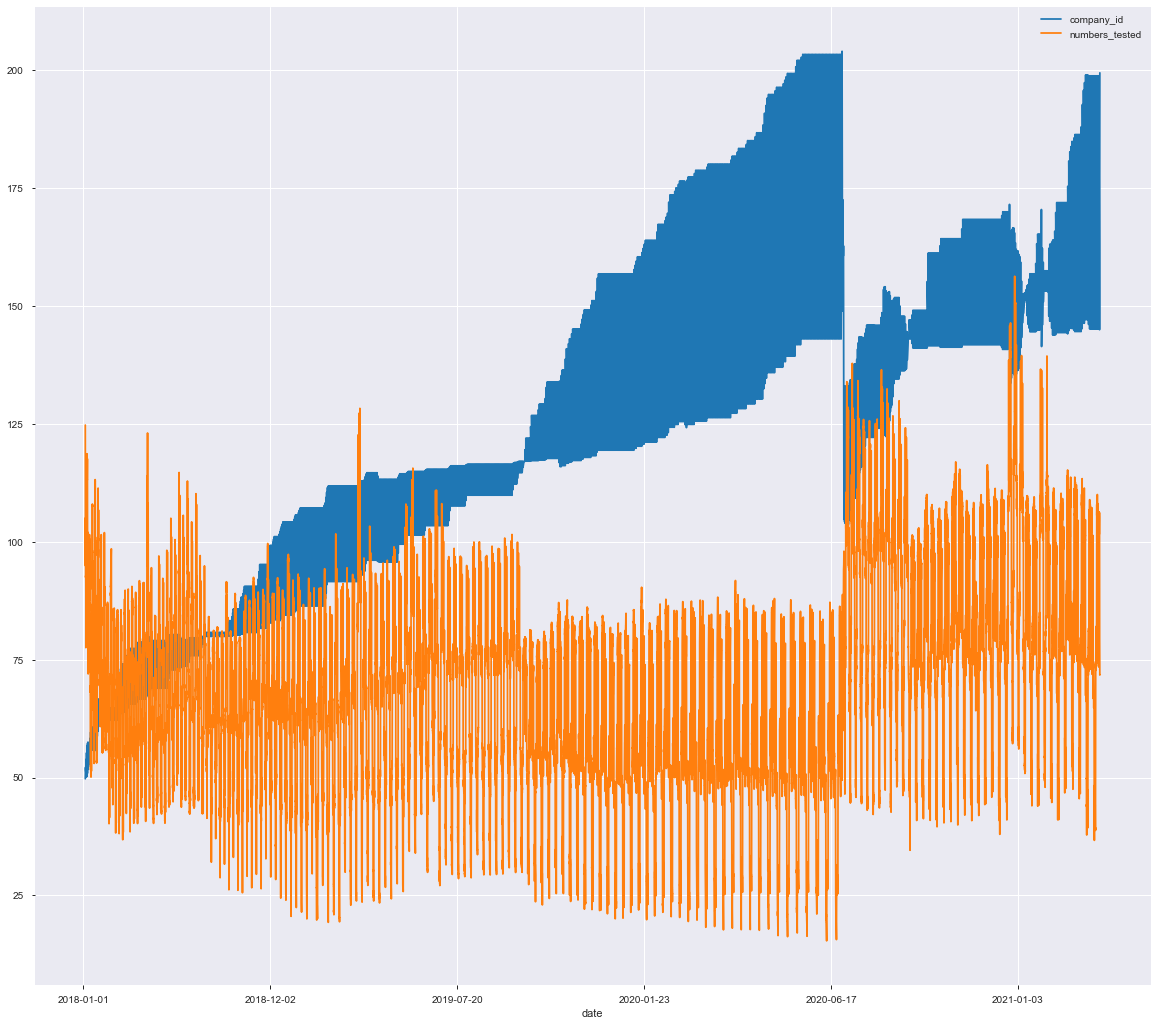

In [54]:
avg_test.plot(figsize=(20,18))

In [55]:
sm.stats.durbin_watson(df1) # very less correlation

array([0.03662101, 1.75160154])

In [60]:
df2 = df1[['numbers_tested']]
df2.head()

,numbers_tested
date,
2018-01-01,2562
2018-01-01,2410
2018-01-01,207
2018-01-01,62
2018-01-01,13


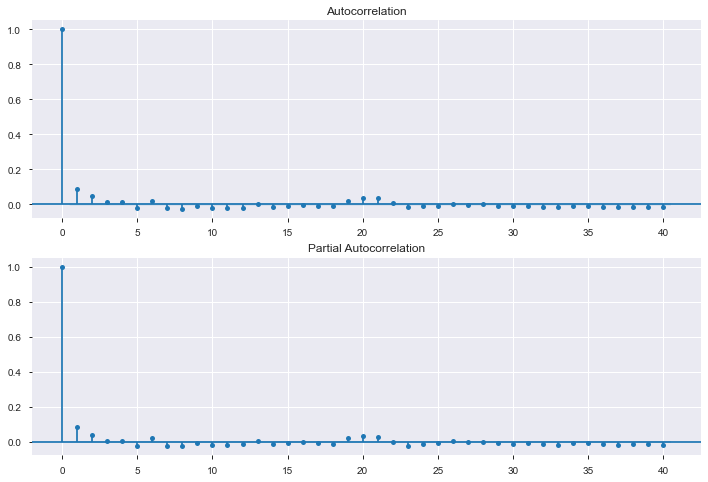

In [61]:
#  plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)

ValueError: x is required to have ndim 1 but has ndim 2

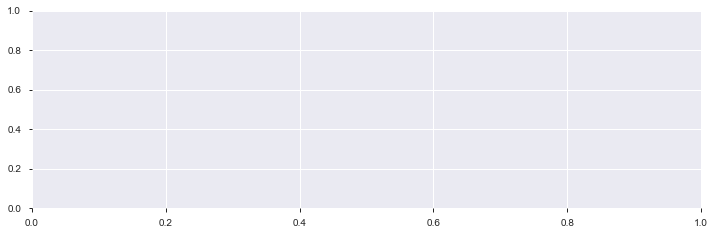

In [78]:
#  plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1, lags=40, ax=ax2)
ax3 = fig.add_subplot(213)
fig = sm.graphics.tsa.plot_pacf(df1, lags=40, ax=ax3)

In [64]:
df.shape

(108760, 15)

In [79]:
print("training_data_size =", 108760 * 0.8)
print("testing_data_size = ",108760 * 0.2)

training_data_size = 87008.0
testing_data_size =  21752.0


In [83]:
training_data=df2[0:200]
test_data=df2[200:400]

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
arima= ARIMA(training_data,order=(2,1,3))

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [86]:
model=arima.fit()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('igno

In [87]:
model.aic

2941.3441605742496

In [94]:
pred= model.forecast(steps=200)[0]
pred

array([ -10.36965079,  -32.38487544,  -34.06309398,  -27.41706308,
        -18.42152932,   -9.80697336,   -2.62532405,    2.8913667 ,
          6.87356515,    9.58064085,   11.28911582,   12.24520231,
         12.64970781,   12.65805085,   12.38637999,   11.9193349 ,
         11.31742551,   10.62326316,    9.86648877,    9.06751077,
          8.2402588 ,    7.39416879,    6.53559027,    5.6687706 ,
          4.79653578,    3.9207569 ,    3.04266727,    2.16307639,
          1.28251352,    0.40132339,   -0.48027022,   -1.36212256,
         -2.24414031,   -3.12626348,   -4.00845363,   -4.89068621,
         -5.7729456 ,   -6.65522186,   -7.53750871,   -8.41980219,
         -9.3020998 ,  -10.18439998,  -11.06670175,  -11.9490045 ,
        -12.83130785,  -13.71361157,  -14.59591551,  -15.47821959,
        -16.36052375,  -17.24282796,  -18.1251322 ,  -19.00743646,
        -19.88974072,  -20.772045  ,  -21.65434927,  -22.53665355,
        -23.41895783,  -24.30126211,  -25.18356639,  -26.06587

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
import numpy as np
np.sqrt(mean_squared_error(test_data,pred))

447.61003651685655

In [97]:
#This was the sample ARIMA done at preliminary stage

# time Series Model Building

In [98]:
#Import Packages again
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [99]:
df2

,numbers_tested
date,
2018-01-01,2562
2018-01-01,2410
2018-01-01,207
2018-01-01,62
2018-01-01,13
...,...
2021-03-25,2
2021-03-25,7
2021-03-25,121


In [100]:
pwd()

'C:\\Users\\91820'

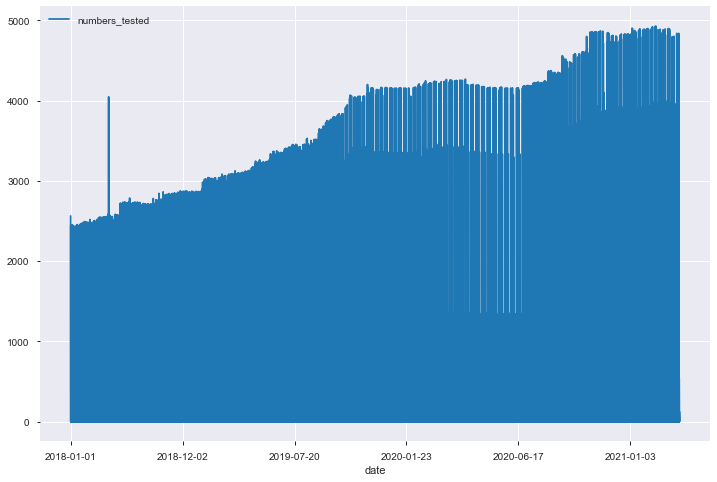

In [101]:
# show plots in the notebook
%matplotlib inline
df2.plot(figsize=(12,8));

In [102]:
sm.stats.durbin_watson(df2)

array([1.75160154])

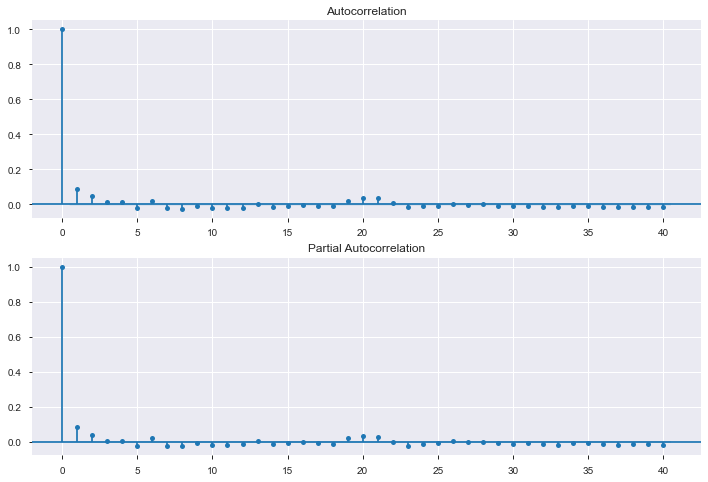

In [103]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2, lags=40, ax=ax2)

<AxesSubplot:xlabel='date'>

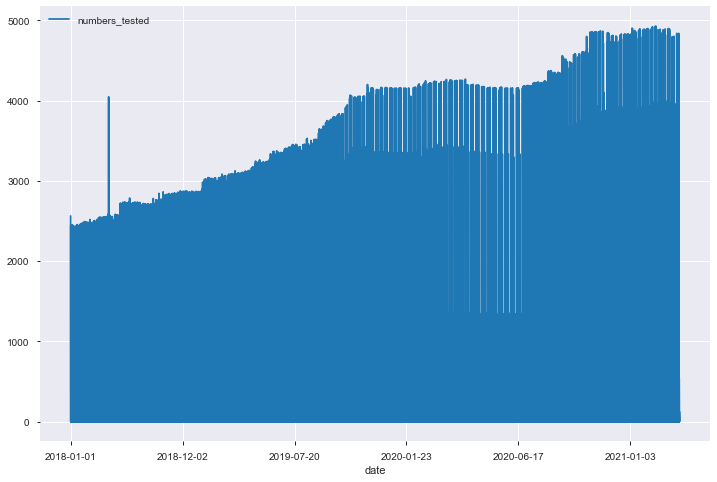

In [104]:
df2.plot(figsize=(12,8))

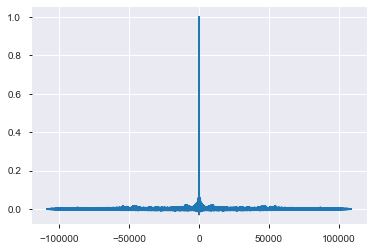

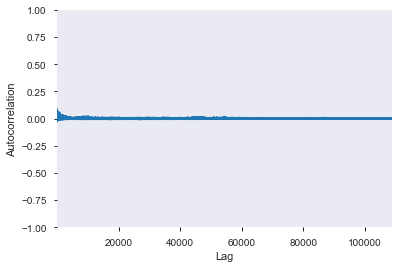

In [108]:
from pandas.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
df2['numbers_tested_2'] = df2['numbers_tested']
df2['numbers_tested_2'] = (df2['numbers_tested_2'] - df2['numbers_tested_2'].mean()) / (df2['numbers_tested_2'].std())
plt.acorr(df2['numbers_tested_2'],maxlags = len(df2['numbers_tested_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(df2['numbers_tested'])
plt.show()

In [110]:
arma_mod20 = sm.tsa.ARMA(df2['numbers_tested'], (1,0)).fit()
print(arma_mod20.params)

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

const                   68.404800
ar.L1.numbers_tested     0.086679
dtype: float64


In [111]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

1570203.6425249802 1570232.4332216764 1570212.3469513366


In [112]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.006564797201331

# Plot the data

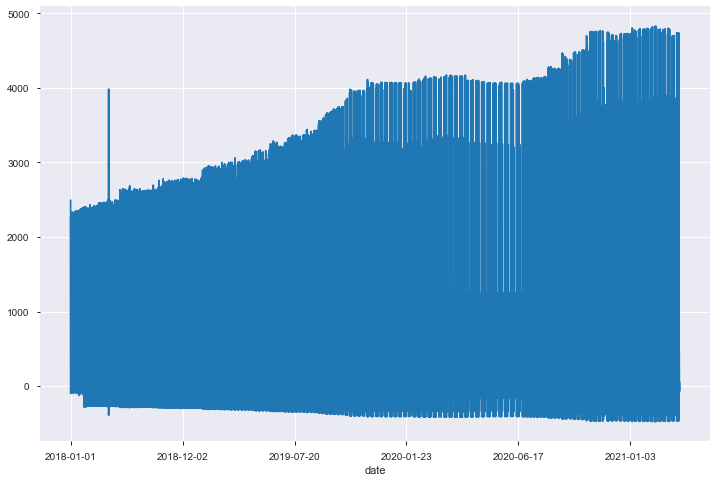

In [113]:

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [114]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=167415.04980386002, pvalue=0.0)

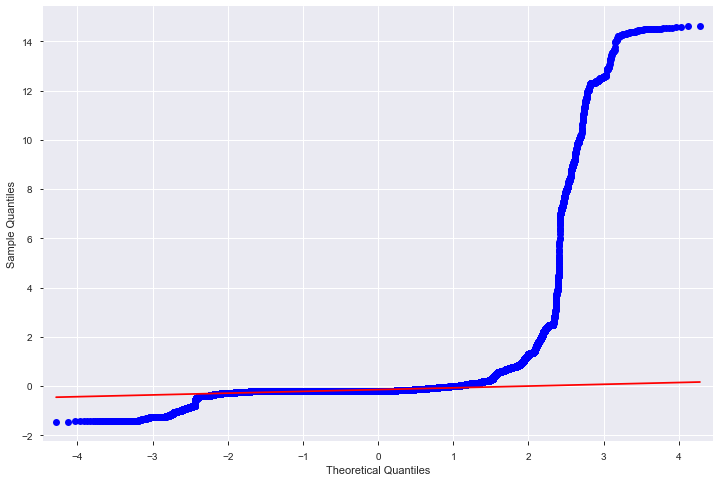

In [115]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

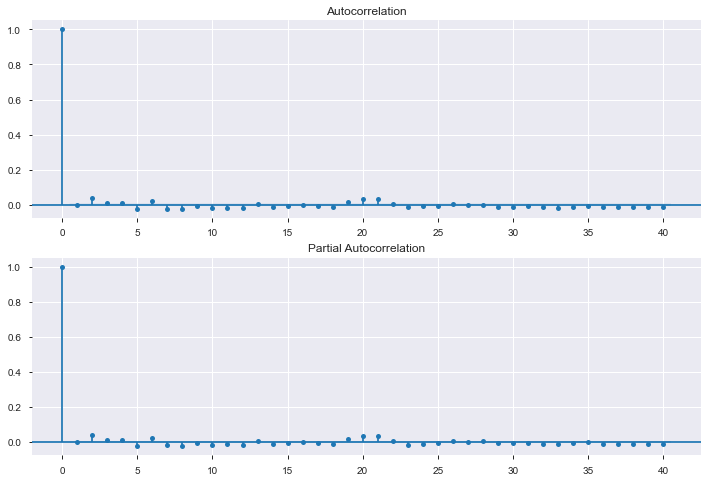

In [116]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [117]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


            AC            Q       Prob(>Q)
lag                                       
1.0  -0.003545     1.366629   2.423920e-01
2.0   0.039535   171.363155   6.151255e-38
3.0   0.008931   180.037695   8.656166e-39
4.0   0.011389   194.145508   6.813764e-41
5.0  -0.024628   260.118363   3.703306e-54
6.0   0.023767   321.556006   1.958060e-66
7.0  -0.022095   374.657946   6.453575e-77
8.0  -0.024964   442.445591   1.536037e-90
9.0  -0.007177   448.048108   7.495217e-91
10.0 -0.018153   483.890061   1.220319e-97
11.0 -0.018227   520.028752  1.711492e-104
12.0 -0.016808   550.758448  3.409774e-110
13.0  0.003753   552.290498  1.115281e-109
14.0 -0.014392   574.820904  1.207923e-113
15.0 -0.008371   582.443947  1.901063e-114
16.0 -0.002991   583.417405  7.503203e-114
17.0 -0.007393   589.363532  2.543594e-114
18.0 -0.012946   607.595217  2.133436e-117
19.0  0.018066   643.099734  3.974316e-124
20.0  0.032561   758.432955  9.311106e-148
21.0  0.031726   867.924431  3.496642e-170
22.0  0.006

In [125]:
df2.tail()

,numbers_tested,numbers_tested_2
date,,
2021-03-25,2,-0.200348
2021-03-25,7,-0.185262
2021-03-25,121,0.158683
2021-03-25,0,-0.206382
2021-03-25,0,-0.206382


In [148]:
predict_test20 = arma_mod20.predict('2021-01-01', '2021-03-25', dynamic=True)
print(predict_test20)

date
2021-01-01    65.509289
2021-01-01    68.153819
2021-01-01    68.383045
2021-01-01    68.402915
2021-01-01    68.404637
                ...    
2021-03-24    68.404800
2021-03-24    68.404800
2021-03-24    68.404800
2021-03-24    68.404800
2021-03-25    68.404800
Length: 8833, dtype: float64


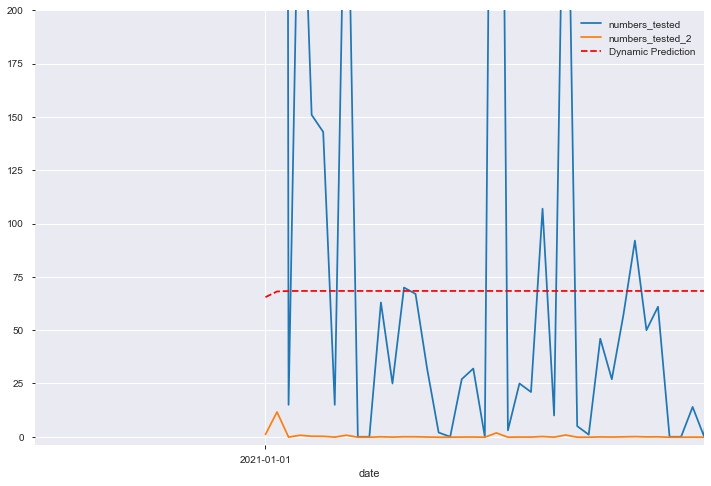

In [146]:
ax = df2.loc['2021-01-01':'2021-01-31'].plot(figsize=(12,8))
ax = predict_test20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

##Errors

In [137]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [138]:
print("MFE = ", mean_forecast_err(df2.numbers_tested, predict_test20))
print("MAE = ", mean_absolute_err(df2.numbers_tested, predict_test20))

MFE =  18.26752748385035
MAE =  0.2670518318786105


In [139]:
#Here MFE > 0, models tends to under-forecast.

In [140]:
#However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. 

In [ ]:
#The measure of MAE being small would indicate a pretty good fit.